# Data investigation
Getting a feel for the disease gene graph. http://snap.stanford.edu/biodata/datasets/10012/10012-DG-AssocMiner.html

In [1]:
import numpy as np

import networkx as nx

from matplotlib import pyplot as plt

In [3]:
# load the data
G = nx.read_gpickle("data/vis_graph.pkl")

In [4]:
def draw_graph(G, layout="circular", subgraph=True, subgraph_node_range=(350, 900),
               disease_color="olivedrab", gene_color="gold"):
    layouts = {"circular": nx.circular_layout, "kamada_kawai": nx.kamada_kawai_layout, "spring": nx.spring_layout}
    assert layout in layouts.keys(), 'layout must be "circular", "kamada_kawai", or "spring"'
    
    if subgraph:
        to_graph = G.subgraph(list(range(subgraph_node_range[0], subgraph_node_range[1])))
    else:
        print("drawing all nodes, this might take a while...")
        to_graph = G
    
    pos = layouts[layout](to_graph)
    
    disease_nodes = [node[0] for node in list(to_graph.nodes(data=True)) if node[1]["x"][0]==1]
    print(len(disease_nodes), "disease nodes")
    gene_nodes = [node[0] for node in list(to_graph.nodes(data=True)) if node[1]["x"][0]==0]
    print(len(gene_nodes), "gene nodes")
    
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(to_graph, pos=pos, nodelist=disease_nodes, node_color=disease_color,
                           label="disease", node_size=150, alpha=.8)
    nx.draw_networkx_nodes(to_graph, pos=pos, nodelist=gene_nodes, node_color=gene_color,
                           label="gene", node_size=50, alpha=.7)
    nx.draw_networkx_edges(to_graph, pos=pos)
    plt.legend(fontsize=14);

219 disease nodes
281 gene nodes


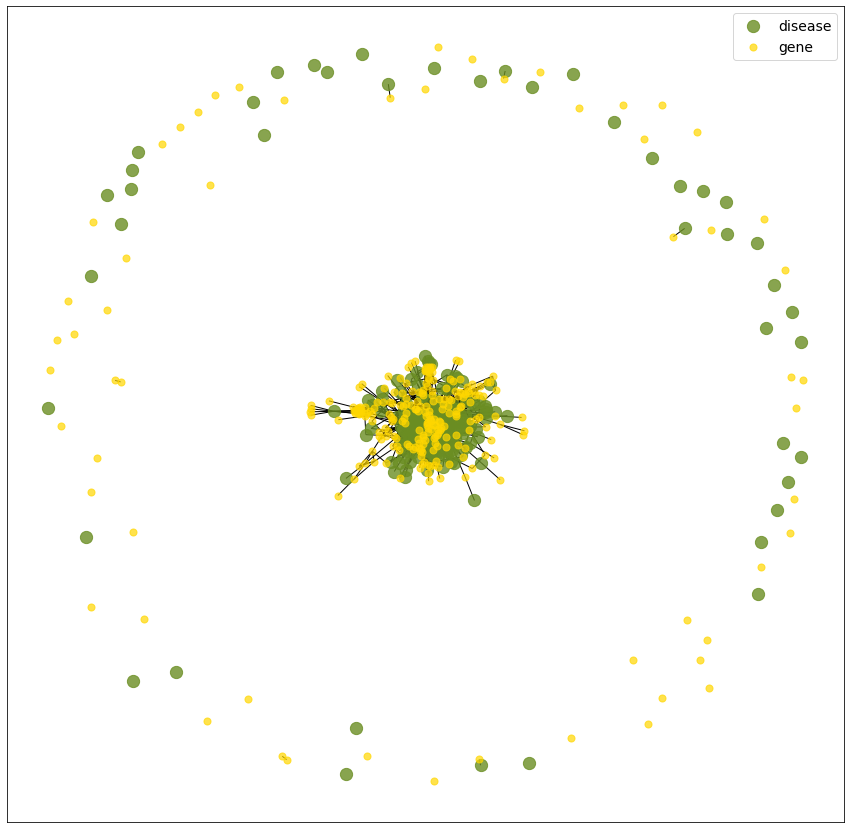

In [5]:
draw_graph(G, layout="spring", subgraph=True, subgraph_node_range=(300, 800))

Looks like this would be a good 3d graph. Could do that following this guide: https://networkx.github.io/documentation/stable/auto_examples/3d_drawing/mayavi2_spring.html

drawing all nodes, this might take a while...
519 disease nodes
7294 gene nodes


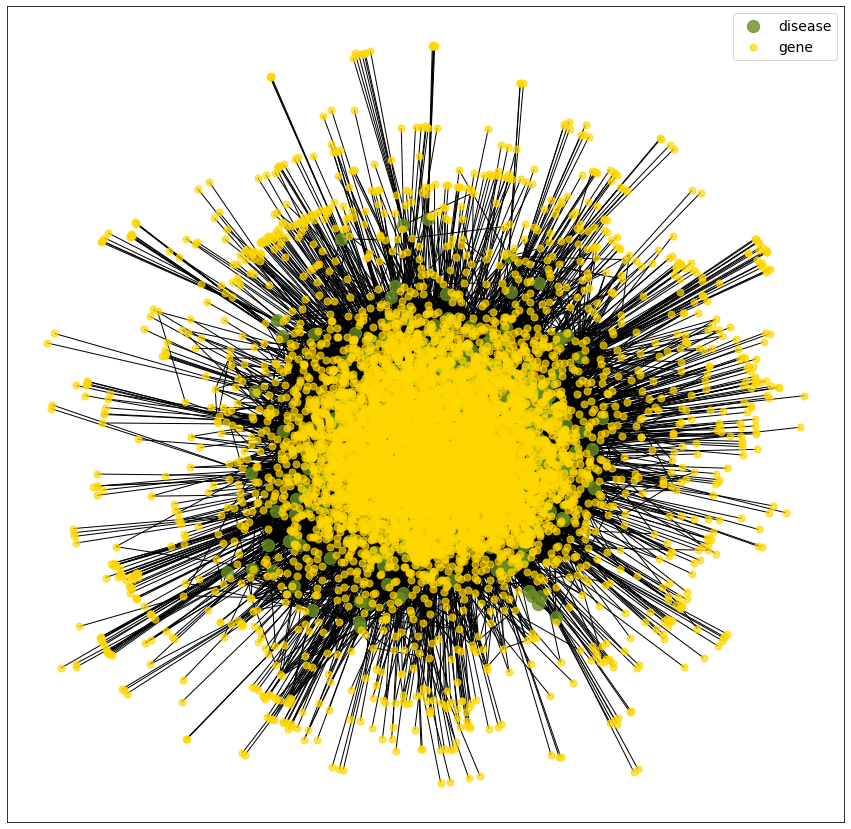

In [10]:
draw_graph(G, layout="spring", subgraph=False)